In [1]:
#
# Analysis script for SlabDetachment model
#
# The user MUST enter a valid outputPath variable.
# The script assumes files width_swarm.* and buildMount.txt exist
#

from mpi4py import MPI
import numpy as np
import h5py
import glob

# replace outputPath here
outputPath = './model_b/'

In [2]:
files = []
for fname in glob.glob(outputPath+'width_swarm.*'):
    files.append(fname)
files.sort()

In [3]:
def readSwarmFile( filename ):
    try:
        h5File = h5py.File(filename,mode='r')
    except:
        print("Can't find {}".format(filename))
        raise

    # grab a copy of the data
    np_data = h5File['data'][:]

    h5File.close()
    
    # parse, by sorting and 
    
    # sort the order: y_axis quickest, then x_axis
    ind = np.lexsort((np_data[:,1],np_data[:,0]))
    new = np_data[ind]

    # analysis only takes one of the columns of particles
    # and measures their distance from the center of the slab
    # this assumes symmetric deformation
    center   = 500 # assumes particle coords in kilometers
    bottom   = 660 # assume model bottom in kilometers
    index    = 0
    minWidth = 1e8 # big number
    
    for ii in range(int(new.shape[0]/2)):
        width = abs(new[ii][0] - 500) 
        if width < minWidth:
            minWidth = width
            index = ii

    
    return minWidth, (bottom-new[index][1])/bottom

In [4]:
width = [1.]
depth = [1.]
for f in files:
    (w, d) = readSwarmFile(f)
    width.append(w/40.)
    depth.append(d)

In [5]:
# parse the outputfile 'buildMount.txt', 3rd column is model_time
info = open(outputPath+"buildMount.txt", "r")

t_c = 22.56e6
model_time = [0.]
hmm = info.readline() # burn the header row

for line in info:
    time = line.split(', ')[2]
    time = time.split(' ')[0]
    model_time.append(float(time)/t_c)

info.close()

In [6]:
raijinimport matplotlib.pyplot as plt

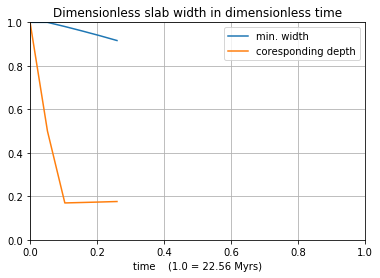

In [7]:
plt.ylim(0.,1.)
plt.xlim(0.,1.)
plt.title("Dimensionless slab width in dimensionless time")
plt.xlabel("time    (1.0 = 22.56 Myrs)")
plt.plot(model_time, width, label='min. width' )
plt.plot(model_time, depth, label='coresponding depth' )
plt.legend()
plt.grid(True)